In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('white')

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
np.random.seed(12345)

Let's make some data. Say, we have 4 conditions, and within each condition, we have 4 measurements. So we have a repeated measure ANOVA design. The within-subject variance is within each condition, while the between-subject variance is between conditions. 

I am not sure if the simulated data could in fact have some significant difference, but let's assume there is, and what it means for classification instead of statistical analysis. 

Statisical analyses are to break down the within- and between-subject variance and determine whether the variance causes the difference among means. On the hand, classification is to map the measures to the label (condition and within-condition measures), and determine whether the classification models could learn the pattern among the data. 

# Condition 1

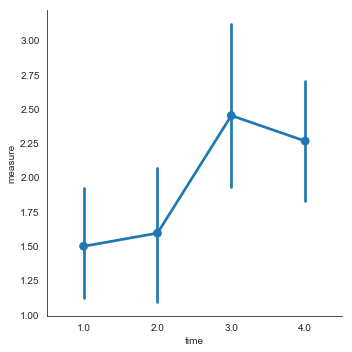

In [39]:
means = [1.1,1.5,2.1,2.9]
stds = [.8,.7,.9,.8]
n = 10
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([1]*n)
    time.append([ii+1]*n)
df1 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])
df1['sub'] = np.tile(np.arange(1,n+1),4)
sns.catplot(x='time',y='measure',data=df1,kind = 'point')

# condition 2

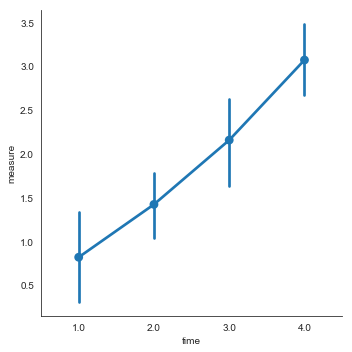

In [40]:
means = [1.2,1.4,2.4,3.1]
stds = [.8,.7,.9,.8]
n = 10
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([2]*n)
    time.append([ii+1]*n)
df2 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])
df2['sub'] = np.tile(np.arange(1,n+1),4)
sns.catplot(x='time',y='measure',data=df2,kind = 'point')

# condition 3

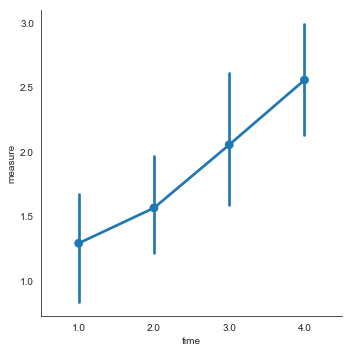

In [41]:
means = [1.0,1.2,2.1,2.8]
stds = [.8,.7,.9,.8]
n = 10
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([3]*n)
    time.append([ii+1]*n)
df3 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])
df3['sub'] = np.tile(np.arange(1,n+1),4)
sns.catplot(x='time',y='measure',data=df3,kind = 'point')

# condition 4

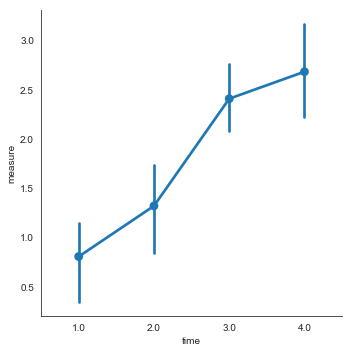

In [42]:
means = [1.1,1.2,2.3,2.8]
stds = [.8,.7,.9,.8]
n = 10
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([4]*n)
    time.append([ii+1]*n)
df4 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])
df4['sub'] = np.tile(np.arange(1,n+1),4)
sns.catplot(x='time',y='measure',data=df4,kind = 'point')

# Put the data into a data frame (excel format)

In [43]:
df = pd.concat([df1,df2,df3,df4])

# Superimpose the data together. X axis is the experiment time, y axis is the measures, and the experiment conditions are color coded

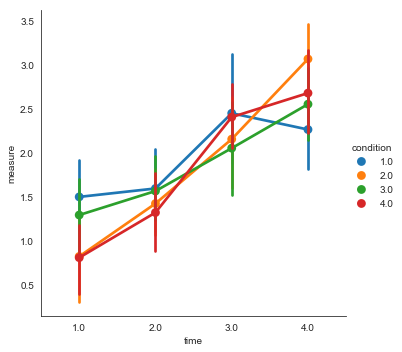

In [44]:
sns.catplot(x='time',y='measure',hue='condition',data=df,kind = 'point')

As the figure showed above, it is difficult to tell whether there is a significant difference among the means across measure conditions at a given time. However, we see a trend, a upward trend across time. 

The question is, what is a main effect of time? What does it mean? I interpret the main effect of time as the probability that there exist a difference among measures in different experiment time given that the same conditions = p($\Delta$ measure at times | condition) > chance level. But what would be the chance level? That should the classification/regression metrics for randomized data. 

# Before we do the machine learning, let's see what the results should be in a repeated 2-way ANOVA

In [45]:
from statsmodels.stats.anova import AnovaRM

In [46]:
aovrm = AnovaRM(df,depvar='measure',subject='sub',within=['time','condition'],aggregate_func='mean')
res = aovrm.fit()
print(res)

                   Anova
               Num DF  Den DF F Value Pr > F
--------------------------------------------
time           3.0000 27.0000 31.8331 0.0000
condition      3.0000 27.0000  0.3378 0.7981
time:condition 9.0000 81.0000  1.4262 0.1908

